In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL0xlbm92by9EZXNrdG9wL3BmamF4L2RvY3M='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.

In [2]:
# jax
import jax
import jax.numpy as jnp
import jax.scipy as jsp
import jax.random as random
from functools import partial
# plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# pfjax
import pfjax as pf
import pfjax.mcmc
from pfjax.models import BMModel

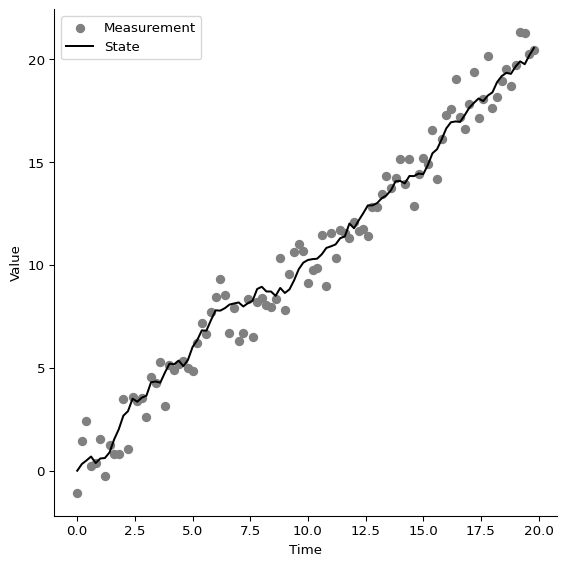

In [3]:
# initial key for random numbers
key = random.PRNGKey(0)

# parameter values
mu, sigma, tau = 1., .5, .8
theta_true = jnp.array([mu, jnp.log(sigma), jnp.log(tau)])

# data specification
dt = .2
n_obs = 100
x_init = jnp.array([0.])

# simulate data
bm_model = BMModel(
    dt=dt, 
    unconstrained_theta=True # puts theta on the unconstrained scale
) 
key, subkey = random.split(key)
y_meas, x_state = pf.simulate(
    model=bm_model,
    key=subkey,
    n_obs=n_obs,
    x_init=x_init,
    theta=theta_true
)

# plot data
plot_df = (pd.DataFrame({"time": jnp.arange(n_obs) * dt,
                         "state": jnp.squeeze(x_state),
                         "meas": jnp.squeeze(y_meas)}))

g = sns.FacetGrid(plot_df, height = 6)
g = g.map(plt.scatter, "time", "meas", color="grey")
plt.plot(plot_df['time'], plot_df['state'], color='black')
plt.legend(labels=["Measurement","State"])
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [4]:
def particle_gibbs(key, n_iter, theta_init, x_state_init, n_particles, rw_sd):
    """
    Sample from the joint posterior distribution of parameters and latent states using a Particle Gibbs sampler.

    Args:
        key: PRNG key.
        n_iter: Number of MCMC iterations.
        theta_init: A vector of `n_params` initial parameter values on the unconstrained scale.
        x_state_init: JAX PyTree of initial state variables.
        n_particles: Number of particles for the particle filter.
        rw_sd: Vector of `n_params` initial standard deviations for the adaptive MWG proposal.

    Returns:
        A dictionary with elements

        - **x_state** - MCMC output for the state variables, with leading dimension `n_iter`.
        - **theta** - MCMC output for the unconstrained parameters, with leading dimension `n_iter`.
        - **accept_rate** - Vector of `n_params` acceptance rates.  These should be close to 0.44.
    """
    # initialize the sampler
    n_params = theta_init.size
    amwg = pfjax.mcmc.AdaptiveMWG()
    # initial state of MWG sampler
    initial_state = {
        "theta": theta_init,
        "x_state": x_state_init,
        "adapt_pars": amwg.init(rw_sd),
    }

    def mcmc_update(key, theta, x_state, adapt_pars):
        """
        MCMC update for parameters and latent variables.

        Use Adaptive MWG for the former and a particle filter for the latter.
        """
        keys = jax.random.split(key, num=3) # two for particle_filter, one for amwg
        # latent variable update
        pf_out = pf.particle_filter(
            model=bm_model,
            key=keys[0],
            y_meas=y_meas,
            theta=theta,
            n_particles=n_particles,
            history=True
        )
        x_state = pf.particle_smooth(
            key=keys[1],
            logw=pf_out["logw"][y_meas.shape[0]-1],
            x_particles=pf_out["x_particles"],
            ancestors=pf_out["resample_out"]["ancestors"]
        )

        # parameter update
        def logpost(theta):
            """
            Log-posterior of the conditional parameter distribution.
            """
            return pf.loglik_full(
                model=bm_model,
                theta=theta,
                x_state=x_state,
                y_meas=y_meas
            )
        theta_state, accept = amwg.step(
            key=keys[2],
            position=theta,
            logprob_fn=logpost,
            rw_sd=adapt_pars["rw_sd"]
        )
        # adapt random walk jump sizes
        adapt_pars = amwg.adapt(pars=adapt_pars, accept=accept)
        return theta_state, x_state, adapt_pars, accept

    @jax.jit
    def step(state, key):
        """
        One step of MCMC update.
        """
        theta, x_state, adapt_pars, accept = mcmc_update(
            key=key,
            theta=state["theta"],
            x_state=state["x_state"],
            adapt_pars=state["adapt_pars"]
        )
        new_state = {
            "theta": theta, 
            "x_state": x_state, 
            "adapt_pars": adapt_pars
        }
        stack_state = {
            "theta": theta, 
            "x_state": x_state
        }
        return new_state, stack_state
    
    keys = jax.random.split(key, num=n_iter)
    state, out = jax.lax.scan(step, initial_state, keys)
    # calculate acceptance rate
    out["accept_rate"] = (1.0 * state["adapt_pars"]["n_accept"]) / n_iter
    return out

In [5]:
n_particles = 50
rw_sd = 1. * jnp.array([1., 1., 1.])
n_iter = 20_000

key, subkey = jax.random.split(key)
pg_out = particle_gibbs(
    key=subkey, 
    n_iter=n_iter, 
    theta_init=theta_true, 
    x_state_init=x_state, 
    n_particles=n_particles, 
    rw_sd=rw_sd
)

pg_out["accept_rate"] # should be close to 0.44

Array([0.429  , 0.4446 , 0.43505], dtype=float32)

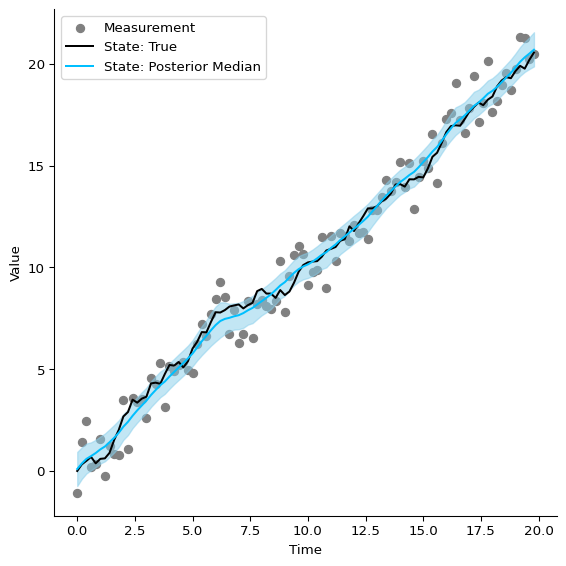

In [6]:
# plot data
plot_pg = (pd.DataFrame({"time": jnp.arange(n_obs) * dt,
                         "state": jnp.squeeze(x_state),
                         "meas": jnp.squeeze(y_meas),
                         "med": jnp.squeeze(jnp.median(pg_out["x_state"],axis=0)),
                         "2.5th": jnp.squeeze(jnp.percentile(pg_out["x_state"], 2.5, axis=0)),
                         "97.5th": jnp.squeeze(jnp.percentile(pg_out["x_state"], 97.5, axis=0))}))

g = sns.FacetGrid(plot_pg, height = 6)
g = g.map(plt.scatter, "time", "meas", color="grey")
plt.plot(plot_df['time'], plot_pg['state'], color='black')
plt.plot(plot_df['time'], plot_pg['med'], color='deepskyblue')

plt.fill_between(plot_df['time'], plot_pg['2.5th'], plot_pg['97.5th'], color='skyblue', alpha=0.5)

plt.legend(labels=["Measurement", "State: True", "State: Posterior Median"])
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

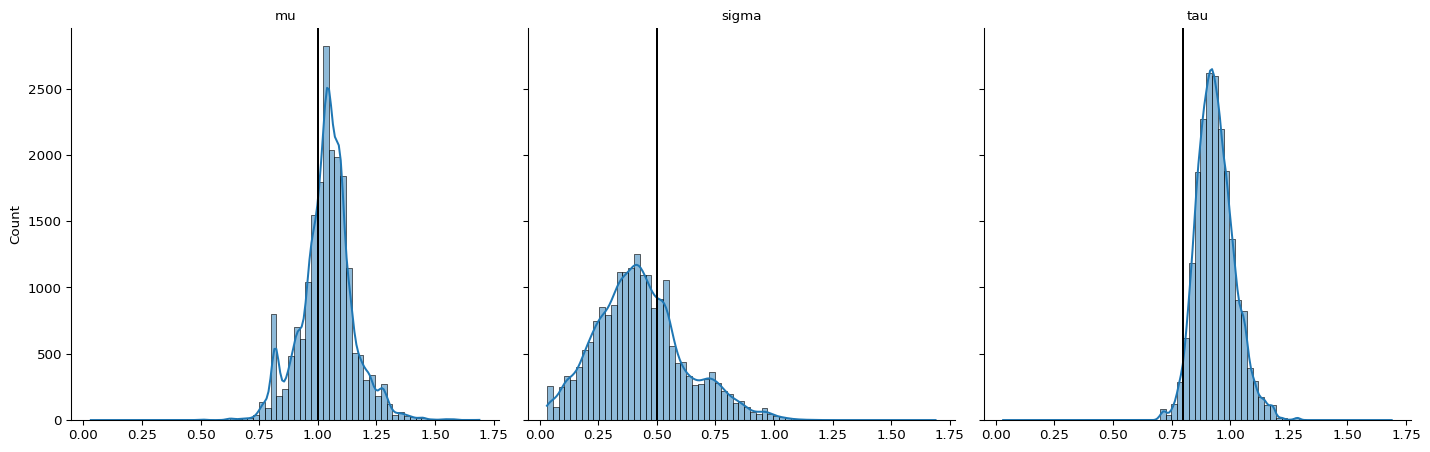

In [7]:
plot_pg = pd.DataFrame({"iter": jnp.arange(n_iter),
                         "mu": pg_out['theta'][:,0],
                         "sigma": jnp.exp(pg_out['theta'][:,1]),
                         "tau": jnp.exp(pg_out['theta'][:,2])})
plot_pg = pd.melt(plot_pg, id_vars=['iter'], value_vars=['mu', 'sigma', 'tau'])

hp = sns.displot(
    data=plot_pg, 
    x="value", 
    col="variable",
    kde=True
)
hp.set_titles(col_template="{col_name}")
hp.set(xlabel=None)
# add true parameter values
for ax, theta in zip(hp.axes.flat, jnp.array([mu, sigma, tau])):
    ax.axvline(theta, color="black")

In [8]:
grad_fun = jax.jit(jax.grad(bm_model.loglik_exact, argnums = 1))

# Gradient ascent learning rate
learning_rate = 0.01

theta_mode = theta_true

for i in range(1000):
    grads = grad_fun(y_meas, theta_mode)
    # Update parameters via gradient ascent
    theta_mode = theta_mode + learning_rate * grads

# def hessian(f):
#     return jax.jacfwd(jax.grad(f, argnums = 2), argnums = 2)

# hess = hessian(bm_loglik)(y_meas, dt, theta_mode)
hess = jax.jacfwd(jax.jacrev(bm_model.loglik_exact, argnums=1), argnums=1)(y_meas, theta_mode)
theta_quad = -jnp.linalg.inv(hess)

print(theta_mode)
print(theta_true)
print(theta_quad)

[ 1.0411831  -1.0344276  -0.07254299]
[ 1.         -0.6931472  -0.22314353]
[[ 7.1736602e-03  1.7676310e-03 -1.5563190e-04]
 [ 1.7676126e-03  1.9352007e-01 -1.1542993e-02]
 [-1.5563004e-04 -1.1542979e-02  6.5114447e-03]]


In [9]:
# Draw from the mode-quadrature distribution
infl = 1.5  # Inflation factor
key, subkey = jax.random.split(key)
draws = random.multivariate_normal(
    subkey, mean=theta_mode, cov=infl*theta_quad, shape=(n_iter,))

logpost = jax.jit(bm_model.loglik_exact)

# Importance sampling with mode-quadrature proposal and target proposal (BM log-likelihood)
logq_x = jsp.stats.multivariate_normal.logpdf(
    draws, mean=theta_mode, cov=infl*theta_quad)
# logp_x = jnp.array([bm_loglik(y_meas, dt, draws[i,:]) for i in range(n_iter)])
logp_x = jax.vmap(
    fun=logpost,
    in_axes=(None, 0)
)(y_meas, draws)

# Get the likelihood ratio and normalize
logw = logp_x - logq_x
prob = pf.utils.logw_to_prob(logw)

# importance sample
key, subkey = jax.random.split(key)
imp_index = jax.random.choice(
    subkey, a=n_iter, p=prob, shape=(n_iter,), replace=True)
theta_imp = draws[imp_index, :]

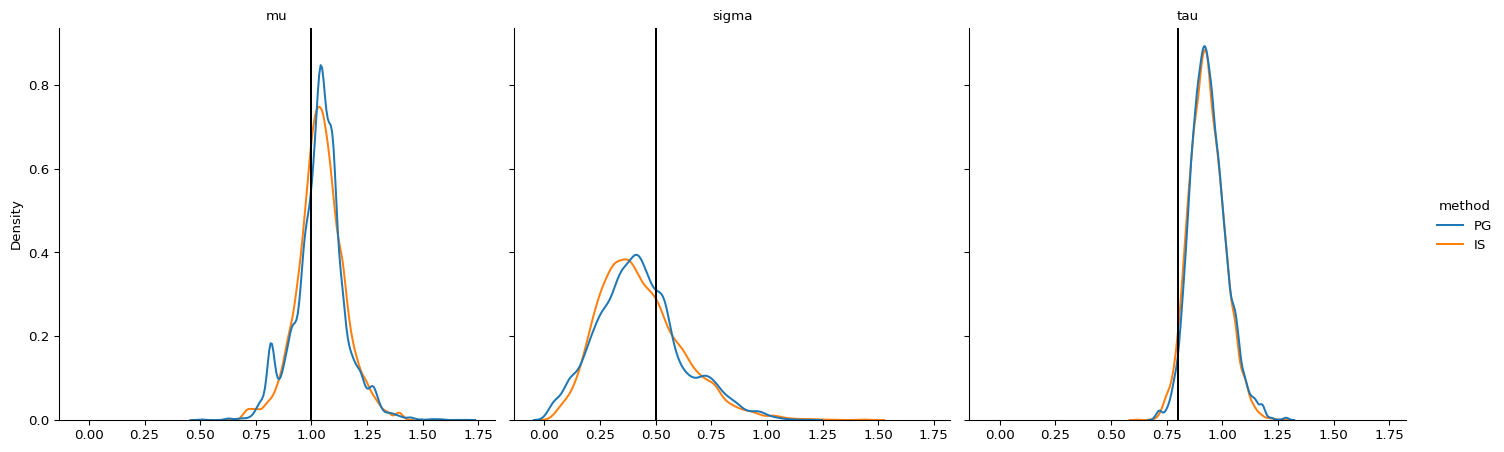

In [10]:
plot_imp = pd.DataFrame({"iter": jnp.arange(n_iter),
                           "mu": theta_imp[:,0],
                           "sigma": jnp.exp(theta_imp[:,1]),
                           "tau": jnp.exp(theta_imp[:,2])})

plot_imp = pd.melt(plot_imp, id_vars=['iter'], value_vars=['mu', 'sigma', 'tau'])

plot_df = pd.concat([plot_pg, plot_imp], ignore_index=True)
plot_df["method"] = np.repeat(["PG", "IS"], len(plot_pg["variable"]))


hp = sns.displot(
    data=plot_df, 
    x="value", 
    hue="method",
    col="variable",
    kind="kde"
)
hp.set_titles(col_template="{col_name}")
hp.set(xlabel=None)
# add true parameter values
for ax, theta in zip(hp.axes.flat, jnp.array([mu, sigma, tau])):
    ax.axvline(theta, color="black")